# **1 – Visualisation**


In [ ]:
! pip install pyxlsb


In [ ]:
import pandas as pd


df = pd.read_excel('/content/20210614 Ecommerce sales.xlsx', sheet_name='20210614 Ecommerce sales')


print(df.head())




     Cod_cmd                                  Libellé produit        Vendeur  \
0  182210782     Table basse carrée detroit design industriel  Autre vendeur   
1  182082437                Ours en peluche géant 150 cm brun  Autre vendeur   
2  182095765               Ours en peluche géant 100 cm blanc  Autre vendeur   
3  182615392  Lot de 4 chaises mia noires pour salle à manger  Autre vendeur   
4  184222081               Meuble tv falko bois blanc et gris  Autre vendeur   

               Univers       Nature Date de commande  Montant cmd  Quantité  \
0  Canapé Salon Séjour  Table basse       2021-01-20          244         4   
1          Enfant Bébé      Peluche       2021-01-17           28         1   
2          Enfant Bébé      Peluche       2021-01-18           15         1   
3  Canapé Salon Séjour       Chaise       2021-01-23          385         2   
4  Canapé Salon Séjour    Meuble tv       2021-02-11           61         1   

   Prix transport  Délai transport annoncé  

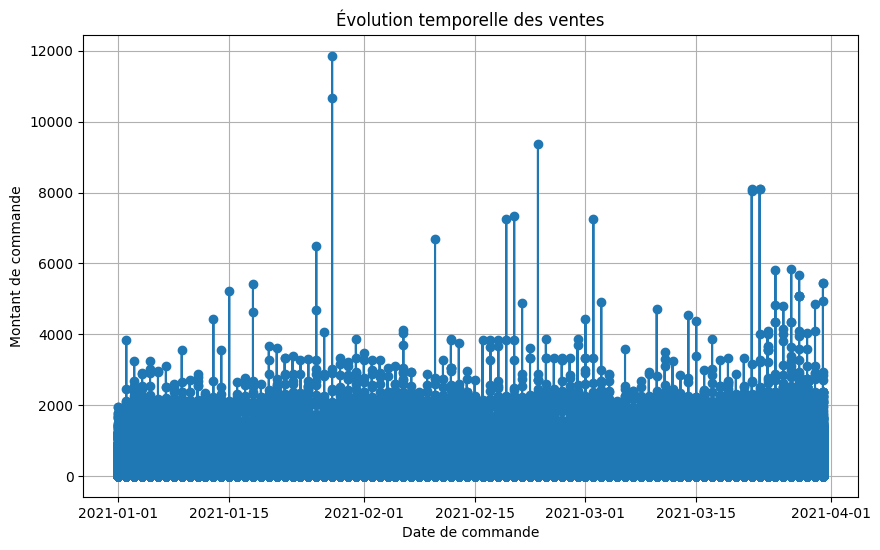

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier Excel au format XLSX
df = pd.read_excel('/content/20210614 Ecommerce sales.xlsx', sheet_name='20210614 Ecommerce sales')

# Trier les données par date de commande
df = df.sort_values('Date de commande')

# Convertir la colonne 'Date de commande' en format de date
df['Date de commande'] = pd.to_datetime(df['Date de commande'])

# Visualisation de l'évolution temporelle des ventes
plt.figure(figsize=(10, 6))
plt.plot(df['Date de commande'], df['Montant cmd'], marker='o', linestyle='-')
plt.title('Évolution temporelle des ventes')
plt.xlabel('Date de commande')
plt.ylabel('Montant de commande')
plt.grid(True)
plt.show()


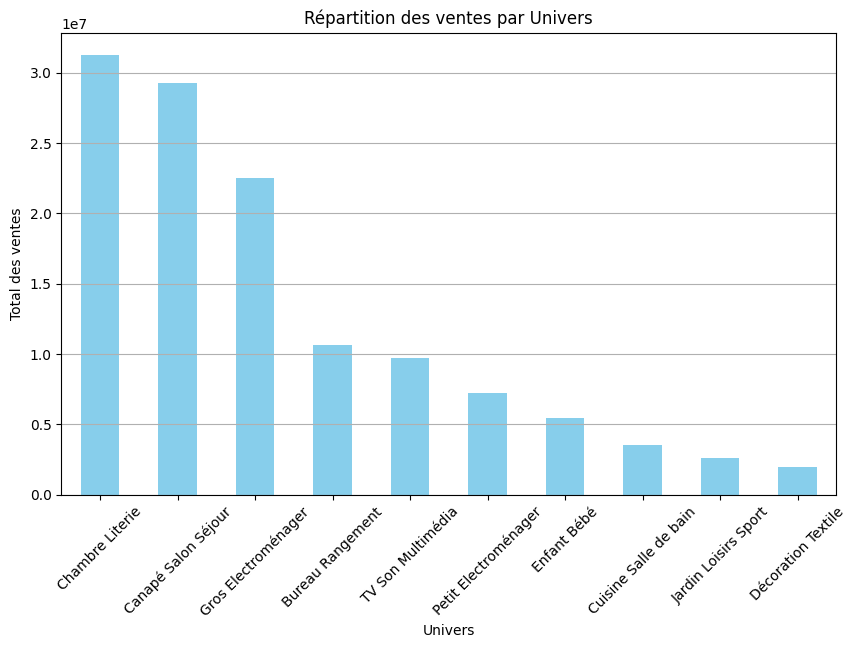

In [ ]:
# Regroupement des ventes par Univers et calcul du total des ventes par Univers

ventes_par_univers = df.groupby('Univers')['Montant cmd'].sum().sort_values(ascending=False)

# Création du graphique à barres pour la répartition des ventes par Univers

plt.figure(figsize=(10, 6))
ventes_par_univers.plot(kind='bar', color='skyblue')
plt.title('Répartition des ventes par Univers')
plt.xlabel('Univers')
plt.ylabel('Total des ventes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


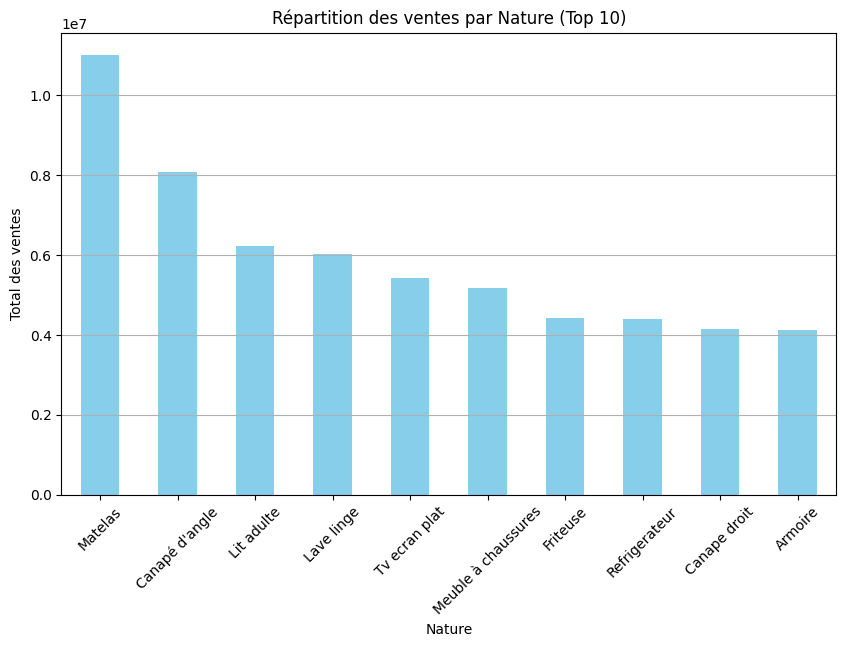

In [ ]:
# Sélection des 10 catégories les plus importantes
ventes_par_nature = df.groupby('Nature')['Montant cmd'].sum().sort_values(ascending=False)
top_categories = ventes_par_nature.head(10)   # J ai fait une selection de certaines natures pas tous car ds le cas ou je fais tout ca devient illisible sur le graphe car il y a bcp d'etiquites !

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Répartition des ventes par Nature (Top 10)')
plt.xlabel('Nature')
plt.ylabel('Total des ventes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

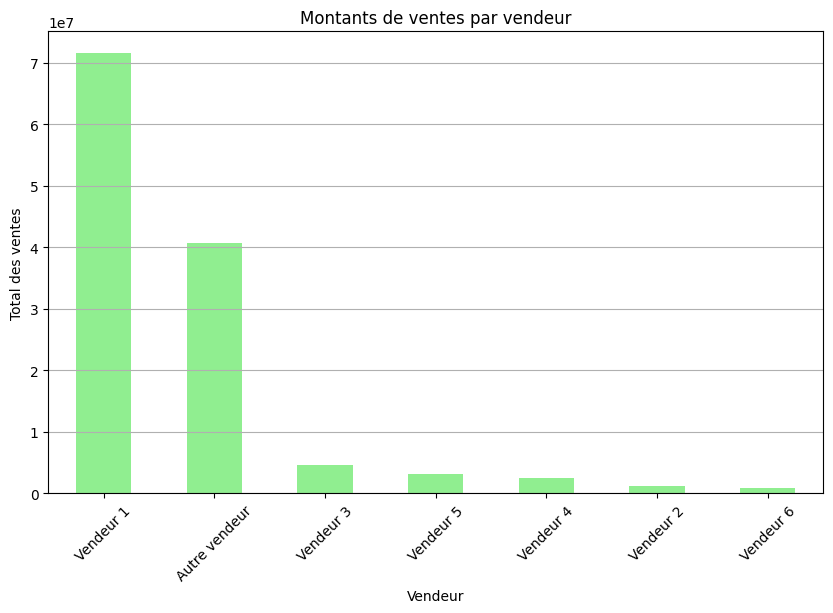

In [ ]:
# Regroupement des ventes par vendeur et calcul du total des ventes par vendeur
ventes_par_vendeur = df.groupby('Vendeur')['Montant cmd'].sum().sort_values(ascending=False)

# Création du graphique à barres pour les montants de ventes par vendeur
plt.figure(figsize=(10, 6))
ventes_par_vendeur.plot(kind='bar', color='lightgreen')
plt.title('Montants de ventes par vendeur')
plt.xlabel('Vendeur')
plt.ylabel('Total des ventes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 35.6 MB/s eta 0:00:00


In [ ]:
df.head()

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé
49662,181060482,Ensemble vital relax 140x190 + sommier kit gris,Autre vendeur,Chambre Literie,Matelas + sommier,2021-01-01,449,1,0.0,45.0
484614,181066936,Porte chaussures 4 niveaux 12 paires,Vendeur 1,Bureau Rangement,Porte chaussures,2021-01-01,15,1,0.0,NaN
51630,181058235,Vidaxl barrière de sécurité de lit enfant gris...,Autre vendeur,Enfant Bébé,Barrière de sécurité,2021-01-01,77,2,0.0,5.0
51628,181061578,Vidaxl étagères murales ch ne sonoma 104x20x60...,Autre vendeur,Canapé Salon Séjour,Etagère,2021-01-01,70,1,0.0,5.0
323615,181058396,Matelas mousse 90x190 cm,Vendeur 1,Chambre Literie,Matelas,2021-01-01,270,1,0.0,NaN


In [ ]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Charger les données
df = pd.read_excel('/content/20210614 Ecommerce sales.xlsx', sheet_name='20210614 Ecommerce sales')

# Initialisation de l'application Dash
app = dash.Dash(__name__)

# Création des graphiques
fig_evolution_temporelle = px.line(df, x='Date de commande', y='Montant cmd', title='Évolution temporelle des ventes')

ventes_par_univers = df.groupby('Univers')['Montant cmd'].sum().sort_values(ascending=False)
fig_ventes_univers = px.bar(ventes_par_univers, x=ventes_par_univers.index, y=ventes_par_univers.values, title='Répartition des ventes par Univers')

ventes_par_nature = df.groupby('Nature')['Montant cmd'].sum().sort_values(ascending=False).head(10)
fig_ventes_nature = px.bar(ventes_par_nature, x=ventes_par_nature.index, y=ventes_par_nature.values, title='Répartition des ventes par Nature (Top 10)')

ventes_par_vendeur = df.groupby('Vendeur')['Montant cmd'].sum().sort_values(ascending=False)
fig_ventes_vendeur = px.bar(ventes_par_vendeur, x=ventes_par_vendeur.index, y=ventes_par_vendeur.values, title='Montants de ventes par vendeur')

# Mise en page de l'application Dash
app.layout = html.Div([
    html.H1("Dashboard de Data Viz"),

    dcc.Graph(figure=fig_evolution_temporelle),
    dcc.Graph(figure=fig_ventes_univers),
    dcc.Graph(figure=fig_ventes_nature),
    dcc.Graph(figure=fig_ventes_vendeur)
])

# Exécution de l'application Dash
if __name__ == '__main__':
    app.run_server(debug=True)



<IPython.core.display.Javascript object>

# 2 – Catégorisation

In [ ]:
# Examiner la répartition des catégories existantes dans la colonne 'Nature'
nature_counts = df['Nature'].value_counts()
print(nature_counts)



Matelas                35593
Lit adulte             21133
Meuble à chaussures    19105
Chaise                 15591
Bureau                 15409
                       ...  
Fendeur de bûches          1
Facade de cuisine          1
Défroisseur                1
Echarpe de portage         1
Lame de terrasse           1
Name: Nature, Length: 596, dtype: int64


In [ ]:
print(df['Nature'].head())

0    Table basse
1        Peluche
2        Peluche
3         Chaise
4      Meuble tv
Name: Nature, dtype: object


In [ ]:
# Filtrer les lignes avec des valeurs vides ou non pertinentes dans la colonne 'Nature'
df = df[df['Nature'].notnull() & (df['Nature'] != '')]

# Nettoyage des chaînes de caractères
import re

def clean_text(text):
    # Convertion du texte en minuscules
    text = text.lower()
    # Remplacons les caractères non alphabétiques par des espaces
    text = re.sub(r'[^a-z\s]', '', text)
    # Suppression des espaces supplémentaires
    text = ' '.join(text.split())
    return text

# Appliquons la fonction de nettoyage à la colonne 'Nature'!
df['Nature'] = df['Nature'].apply(clean_text)


In [ ]:
df['Nature']

0               table basse
1                   peluche
2                   peluche
3                    chaise
4                 meuble tv
                ...        
525029           lit adulte
525030       linge de table
525031    housse de couette
525032              ampoule
525033     ensemble chambre
Name: Nature, Length: 513289, dtype: object

In [ ]:
import difflib
import numpy as np

# Modifions les catégories de référence
categories_reference = ['Matelas', 'Lave linge', "canapé d'angle", 'lit adulte','meuble tv']

def recategorize(category):
    if isinstance(category, float) and np.isnan(category):  # Si la valeur est NaN
        return category
    elif isinstance(category, str):  # Si la valeur est une chaîne de caractères
        similar_category = difflib.get_close_matches(category, categories_reference, n=1, cutoff=0.8)
        if similar_category:
            return similar_category[0]
    return category  # Retourne la valeur telle quelle si elle n'est ni NaN ni str

# Appliquons ca à la colonne 'Nature'
df['Nature'] = df['Nature'].apply(recategorize)


In [ ]:
import difflib
import numpy as np


df['Nature'] = df['Nature'].apply(recategorize)

# Affichage des catégories uniques après la modification
categories_apres_modification = df['Nature'].unique()
print(categories_apres_modification)


['table basse' 'peluche' 'chaise' 'meuble tv' 'meuble chaussures'
 'bibliotheque' 'table' 'bureau' 'banc de lit' 'panneau' 'chevet'
 'commode' 'vitrine' 'canape droit' 'fauteuil' 'cuisine complte'
 'meuble bas cuisine' 'microphone' 'vestiaire' 'surmatelas' 'coffre'
 'accessoire wc' 'console' 'tabouret' 'housse de couette' 'buffet'
 'tente de lit' 'structure armoire' 'coiffeuse' 'etagre' 'rangement sdb'
 'poubelle cuisine' 'buffet de cuisine' 'penderie' 'porte manteau'
 'element bas sdb' 'petit meuble sjour' 'rangement bureau' 'portant'
 'chaise de bureau' 'pouf repose pied' 'miroir psyche' 'dressing complet'
 'fauteuil relax' 'tete de lit' 'aspirateur robot' 'acc telephonie'
 'rideau' 'rideau de douche' 'taie de traversin' 'drap housse'
 'linge doffice' 'poubelle sdb' 'plaid' 'voilage' 'panier linge'
 'cadre photo' 'lampe' 'rangement a poser' 'plafonnier'
 'tapis salle de bain' 'housse mobilier ext' 'poussette' 'colonne sdb'
 'ensemble sdb' "canapé d'angle" 'housse sommier' 'parure de 

In [ ]:
print(df['Nature'].head())

0    table basse
1        peluche
2        peluche
3         chaise
4      meuble tv
Name: Nature, dtype: object


In [ ]:
'''categories_uniques = df['Nature'].unique()

# Affichage des catégories uniques
print(categories_uniques)'''

['table basse' 'peluche' 'chaise' 'meuble tv' 'meuble chaussures'
 'bibliotheque' 'table' 'bureau' 'banc de lit' 'panneau' 'chevet'
 'commode' 'vitrine' 'canape droit' 'fauteuil' 'cuisine complte'
 'meuble bas cuisine' 'microphone' 'vestiaire' 'surmatelas' 'coffre'
 'accessoire wc' 'console' 'tabouret' 'housse de couette' 'buffet'
 'tente de lit' 'structure armoire' 'coiffeuse' 'etagre' 'rangement sdb'
 'poubelle cuisine' 'buffet de cuisine' 'penderie' 'porte manteau'
 'element bas sdb' 'petit meuble sjour' 'rangement bureau' 'portant'
 'chaise de bureau' 'pouf repose pied' 'miroir psyche' 'dressing complet'
 'fauteuil relax' 'tete de lit' 'aspirateur robot' 'acc telephonie'
 'rideau' 'rideau de douche' 'taie de traversin' 'drap housse'
 'linge doffice' 'poubelle sdb' 'plaid' 'voilage' 'panier linge'
 'cadre photo' 'lampe' 'rangement a poser' 'plafonnier'
 'tapis salle de bain' 'housse mobilier ext' 'poussette' 'colonne sdb'
 'ensemble sdb' 'canap dangle' 'housse sommier' 'parure de li

In [ ]:
print(df['Nature'].head())

0    table basse
1        peluche
2        peluche
3         chaise
4      meuble tv
Name: Nature, dtype: object


In [ ]:
print(df['Nature'])

0               table basse
1                   peluche
2                   peluche
3                    chaise
4                 meuble tv
                ...        
525029           lit adulte
525030       linge de table
525031    housse de couette
525032              ampoule
525033     ensemble chambre
Name: Nature, Length: 513289, dtype: object


In [ ]:
print(df)

          Cod_cmd                                    Libellé produit  \
0       182210782       Table basse carrée detroit design industriel   
1       182082437                  Ours en peluche géant 150 cm brun   
2       182095765                 Ours en peluche géant 100 cm blanc   
3       182615392    Lot de 4 chaises mia noires pour salle à manger   
4       184222081                 Meuble tv falko bois blanc et gris   
...           ...                                                ...   
525029  186997203  Lit coffre madrid 140x200 + 1 sommier ch ne bl...   
525030  187045930  Nappe antitache ronde infroissable et 100 poly...   
525031  187019687  Good morning housse de couette pour enfants da...   
525032  186990574                  Ampoule pour four e14 25w 230v ac   
525033  211053330        At4 chambre complète carnaval blanc bouleau   

              Vendeur              Univers             Nature  \
0       Autre vendeur  Canapé Salon Séjour        table basse   
1    

In [ ]:
import pandas as pd
import re

# Fonction pour extraire les dimensions
def extract_dimensions(text):
    # Expression régulière pour extraire les dimensions (chiffres suivis de 'x' pour la longueur et la largeur)
    pattern = r'(\d+(?:\.\d+)?)\s*(?:x|\*)\s*(\d+(?:\.\d+)?)\b'
    match = re.search(pattern, text, flags=re.IGNORECASE)
    if match:
        return f"{match.group(1)}*{match.group(2)}"  # Format "longueur*largeur"
    return None

# Fonction pour extraire les couleurs
def extract_colors(text):
    # Liste de couleurs possibles pour correspondance
    color_list = ['rouge', 'bleu', 'vert', 'jaune', 'noir', 'blanc', 'orange', 'violet', 'rose', 'gris']

    # Expression régulière pour extraire les noms de couleurs
    pattern = r'\b(?:' + '|'.join(color_list) + r')\b'
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    if matches:
        return ', '.join(matches)  # Joindre les couleurs extraites avec une virgule
    return None


df['Dimensions'] = df['Libellé produit'].apply(lambda x: extract_dimensions(x) if isinstance(x, str) else None)

df['Couleurs'] = df['Libellé produit'].apply(lambda x: extract_colors(x) if isinstance(x, str) else None)

# Afficher les données avec les nouvelles colonnes 'Dimensions' et 'Couleurs'
print(df[['Libellé produit', 'Dimensions', 'Couleurs']])


                                          Libellé produit Dimensions  \
0            Table basse carrée detroit design industriel       None   
1                       Ours en peluche géant 150 cm brun       None   
2                      Ours en peluche géant 100 cm blanc       None   
3         Lot de 4 chaises mia noires pour salle à manger       None   
4                      Meuble tv falko bois blanc et gris       None   
...                                                   ...        ...   
525029  Lit coffre madrid 140x200 + 1 sommier ch ne bl...    140*200   
525030  Nappe antitache ronde infroissable et 100 poly...       None   
525031  Good morning housse de couette pour enfants da...    140*200   
525032                  Ampoule pour four e14 25w 230v ac       None   
525033        At4 chambre complète carnaval blanc bouleau       None   

           Couleurs  
0              None  
1              None  
2             blanc  
3              None  
4       blanc, gris  
...

In [ ]:
print(df)

# Les 2 colones sont bien ete ajoutes au df !

          Cod_cmd                                    Libellé produit  \
0       182210782       Table basse carrée detroit design industriel   
1       182082437                  Ours en peluche géant 150 cm brun   
2       182095765                 Ours en peluche géant 100 cm blanc   
3       182615392    Lot de 4 chaises mia noires pour salle à manger   
4       184222081                 Meuble tv falko bois blanc et gris   
...           ...                                                ...   
525029  186997203  Lit coffre madrid 140x200 + 1 sommier ch ne bl...   
525030  187045930  Nappe antitache ronde infroissable et 100 poly...   
525031  187019687  Good morning housse de couette pour enfants da...   
525032  186990574                  Ampoule pour four e14 25w 230v ac   
525033  211053330        At4 chambre complète carnaval blanc bouleau   

              Vendeur              Univers             Nature  \
0       Autre vendeur  Canapé Salon Séjour        table basse   
1    

# 3 – Analyse ventes & prix matelas

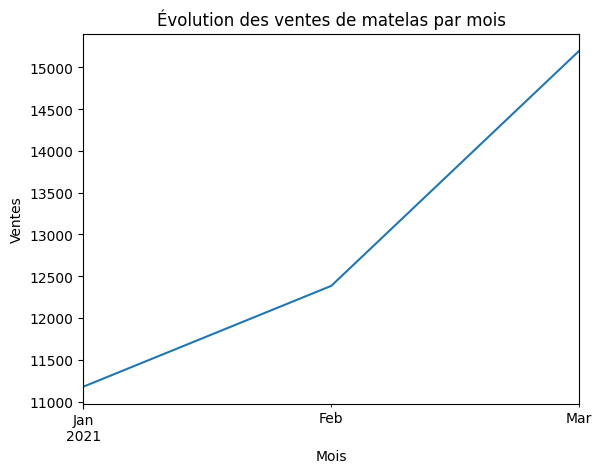

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Conversion de la colonne 'Date de commande' en type datetime
df['Date de commande'] = pd.to_datetime(df['Date de commande'])


#print(df['Date de commande'])
# Aggrégation des ventes par mois

ventes_mois = df[df['Nature'] == 'Matelas'].resample('M', on='Date de commande')['Quantité'].sum()
# Création du graphique pour les ventes par mois
ventes_mois.plot(kind='line', xlabel='Mois', ylabel='Ventes', title='Évolution des ventes de matelas par mois')
plt.show()

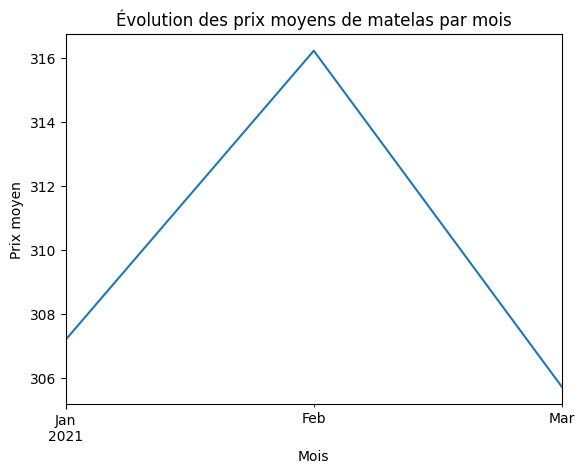

In [ ]:

# Aggrégation des prix moyens par mois
prix_moyens_mois = df[df['Nature'] == 'Matelas'].resample('M', on='Date de commande')['Montant cmd'].mean()

# Création du graphique pour les prix moyens par mois
prix_moyens_mois.plot(kind='line', xlabel='Mois', ylabel='Prix moyen', title='Évolution des prix moyens de matelas par mois')
plt.show()
